In [198]:
from sqlalchemy import create_engine
import pandas as pd
import yaml
from urllib.parse import quote_plus
import numpy as np

In [199]:
def import_credentials(file_path):
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)
    return data

In [200]:
class RDSDatabaseConnector:
    def __init__(self, data):
        self.data = data
        self.engine= None

    def initialize_engine(self):
        HOST = quote_plus(self.data['RDS_HOST'])
        USER = quote_plus(self.data['RDS_USER'])
        PASSWORD = self.data['RDS_PASSWORD']
        DATABASE = self.data['RDS_DATABASE']
        PORT = self.data['RDS_PORT']
                
        # Create the connection URL for SQLAlchemy
        connection_url = f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"
        
        # Create SQLAlchemy engine
        self.engine = create_engine(connection_url)
        print("Engine initialized successfully.")
    
    def extract_data(self, table_name="loan_payments"):
        if self.engine is None:
            raise ValueError("Engine not initialized. Please call 'initialize_engine' first.")
        
        # Query the table and load data into a Pandas DataFrame
        query = f"SELECT * FROM {table_name};"
        df = pd.read_sql(query, self.engine)
        return df

    def save_data_to_csv(self, data, file_name="loan_payments_data.csv"):
        data.to_csv(file_name, index=False)
        print(f"Data saved to {file_name}.")

In [201]:
data = import_credentials('C:/Users/paven/aicore/eda/project/exploratory-data-analysis---customer-loans-in-finance971/credentials.yaml')
db_connector = RDSDatabaseConnector(data)
db_connector.initialize_engine()
data_extract = db_connector.extract_data()
db_connector.save_data_to_csv(data_extract, 'loan_payments_data.csv')

Engine initialized successfully.
Data saved to loan_payments_data.csv.


In [202]:
def load_data_from_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Data successfully loaded from {file_path}.")
        return df
    except FileNotFoundError:
        print(f"Error: The file at {file_path} does not exist.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: The file at {file_path} is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: There was an issue parsing the file at {file_path}.")
        return None


In [220]:
data = load_data_from_csv("C:/Users/paven/aicore/eda/project/exploratory-data-analysis---customer-loans-in-finance971/loan_payments_data.csv")
if data is not None:
    #print(data.head())

Data successfully loaded from C:/Users/paven/aicore/eda/project/exploratory-data-analysis---customer-loans-in-finance971/loan_payments_data.csv.


In [221]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [222]:
class DataTransform:
    def __init__(self, dataframe):
        self.df = dataframe
        
    def numeric_no_string(self, column):
         self.df[column] = self.df[column].str.extract(r'(\d+)').astype(float)
        
    def convert_to_datetime(self, column):
        self.df[column] = pd.to_datetime(self.df[column], format='%b-%Y', errors='raise')
    
    def convert_to_categorical(self, column):
        self.df[column] = self.df[column].astype('category')

    def convert_to_boolean(self, column):
        self.df[column] = self.df[column].astype('boolean')
    
    def remove_currency_symbols(self, column):
        self.df[column] = self.df[column].replace({'\$': '', '€': '', '£': '', ',': ''}, regex=True)
        self.df[column] = pd.to_numeric(self.df[column], errors='coerce')

    def strip_excess_whitespace(self, column):    
        self.df[column] = self.df[column].str.strip()

<>:18: SyntaxWarning: invalid escape sequence '\$'
<>:18: SyntaxWarning: invalid escape sequence '\$'
C:\Users\paven\AppData\Local\Temp\ipykernel_16708\1625514955.py:18: SyntaxWarning: invalid escape sequence '\$'
  self.df[column] = self.df[column].replace({'\$': '', '€': '', '£': '', ',': ''}, regex=True)


In [223]:
new_df = data

In [224]:
#term should be an interger
#employment length should be an interger
#issue date should be datetime
#last payment date should be datetime
#drop mths_since_last_major_derog 
#drop mths_since_last_record 

DataTransform(new_df).numeric_no_string('term')
DataTransform(new_df).numeric_no_string('employment_length')
DataTransform(new_df).convert_to_datetime('issue_date')
DataTransform(new_df).convert_to_datetime('last_payment_date')
DataTransform(new_df).convert_to_datetime('next_payment_date')
DataTransform(new_df).convert_to_datetime('last_credit_pull_date')
DataTransform(new_df).convert_to_categorical('loan_status')

print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  float64       
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  object        
 9   sub_grade                    54231 non-null  object        
 10  employment_length            52113 non-null  float64       
 11  home_ownership               54231 non-nu

In [225]:
class DataFrameInfo:
    def __init__(self, dataframe):
        self.df = dataframe
        
    def describe_columns(self):
        print("Column Descriptions:\n")
        print(self.df.info())
    
    def get_statistics(self):
        print("Column Statistics:\n")
        print(self.df.describe())
    
    def count_distinct_values(self):
        categorical_cols = self.df.select_dtypes(include='category').columns
        distinct_counts = {}
        for col in categorical_cols:
            distinct_counts[col] = self.df[col].nunique()
        return pd.Series(distinct_counts)
    
    def get_column_unique_values(self):
        unique_vals = {}
        for col in self.df.columns:
            unique_vals[col] = self.df[col].unique()
        return unique_vals
    
    def get_shape(self):
        return self.df.shape
    
    def count_nulls(self):
        null_counts = self.df.isnull().sum()
        null_percentage = (self.df.isnull().mean() * 100)
        null_summary = pd.DataFrame({
            'null_count': null_counts,
            'null_percentage': null_percentage
        })
        return null_summary
    
    def get_column_value_counts(self):
        categorical_cols = self.df.select_dtypes(include='category').columns
        value_counts = {}
        for col in categorical_cols:
            value_counts[col] = self.df[col].value_counts()
        return value_counts

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [243]:
class Plotter:
    def __init__(self, df):
        self.df = df

    def plot_missing_data_heatmap(self):
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
        plt.title("Missing Data Heatmap")
        plt.show()
    
    def plot_missing_data_percentage(self, missing_data):
        plt.figure(figsize=(10, 6))
        missing_data.plot(kind='bar', color='salmon')
        plt.title("Percentage of Missing Values per Column")
        plt.ylabel("Percentage of Missing Data (%)")
        plt.show()
    
    def plot_histograms(self, columns):
        for column in columns:
            plt.figure(figsize=(10, 6))
            sns.histplot(self.df[column], kde=True, bins=30)
            plt.title(f'Distribution of {column}')
            plt.show()
    
    def plot_skewed_data(self, columns):
        skew_values = self.df[columns].skew()
        skewed_cols = skew_values[skew_values > 1].index.tolist()
        self.plot_histograms(skewed_cols)
    
    def plot_qq(self, data, title='QQ Plot'):
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(title)
        plt.show()

In [242]:
class DataFrameTransform:
    def __init__(self, df):
        self.df = df
    
    def check_missing_values(self):
        missing_data = self.df.isnull().sum() / len(self.df) * 100
        missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
        return missing_data
    
    def drop_columns_with_missing_values(self, threshold=50):
        missing_data = self.check_missing_values()
        columns_to_drop = missing_data[missing_data > threshold].index
        self.df.drop(columns=columns_to_drop, inplace=True)
    
    def impute_missing_values(self, strategy='mean'):
        # Check for numeric columns
        numeric_columns = self.df.select_dtypes(include=[np.number]).columns
        for column in numeric_columns:
            if self.df[column].isnull().sum() > 0:
                if strategy == 'mean':
                    self.df[column].fillna(self.df[column].mean(), inplace=True)
                elif strategy == 'median':
                    self.df[column].fillna(self.df[column].median(), inplace=True)
        # Check for datetime columns
        date_columns = self.df.select_dtypes(include=['datetime64']).columns
        for column in date_columns:
            if self.df[column].isnull().sum() > 0:
                mode_date = self.df[column].mode()[0]
                self.df[column].fillna(mode_date, inplace=True)
    
    def identify_skewed_columns(self, threshold=1.0):
        skewness = self.df.skew()
        skewed_cols = skewness[skewness.abs() > threshold].index
        return skewed_cols, skewness

    def transform_skewed_columns(self, skewed_columns):
        for column in skewed_columns:
            if self.df[column].min() > 0:  # Log transformation only works on positive values
                # Apply log transformation
                self.df[column] = np.log(self.df[column])
            elif self.df[column].min() >= 0:  # Square root transformation for non-negative values
                # Apply square root transformation
                self.df[column] = np.sqrt(self.df[column])
            else:
                # Apply Box-Cox transformation (for positive values)
                self.df[column], _ = stats.boxcox(self.df[column] + 1)  # Adding 1 to handle zero values
    
    def check_transformation(self):
        skewness = self.df.select_dtypes(include=[np.number]).skew()
        return skewness

In [229]:
transformer = DataFrameTransform(new_df)
plotter = Plotter(new_df)

In [230]:
missing_data = transformer.check_missing_values()
print("Missing Values Percentage:\n", missing_data)

Missing Values Percentage:
 mths_since_last_record         88.602460
mths_since_last_major_derog    86.172116
next_payment_date              60.127971
mths_since_last_delinq         57.166565
int_rate                        9.531449
term                            8.799395
funded_amount                   5.544799
employment_length               3.905515
last_payment_date               0.134609
collections_12_mths_ex_med      0.094042
last_credit_pull_date           0.012908
dtype: float64


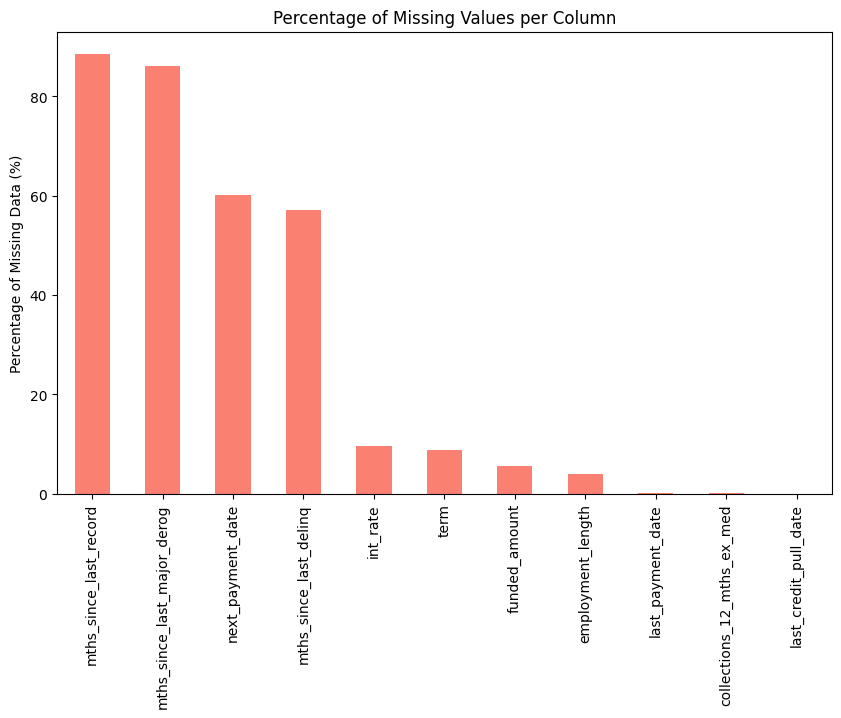

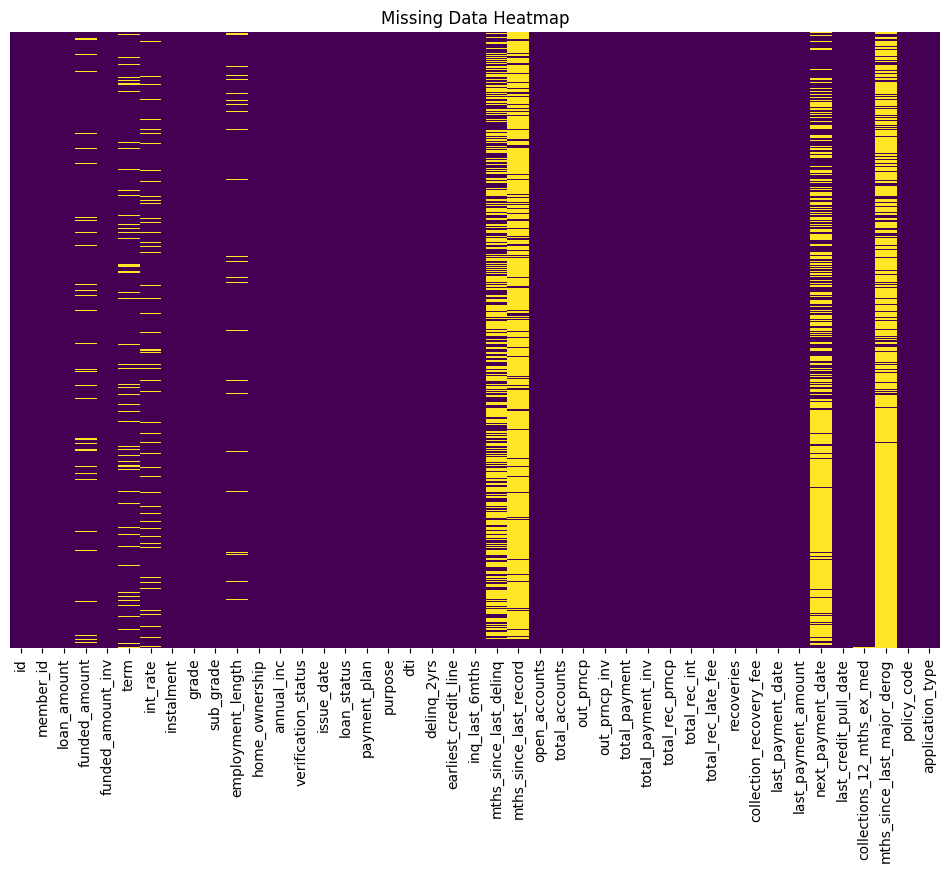

In [231]:
plotter.plot_missing_data_percentage(missing_data)
plotter.plot_missing_data_heatmap()

In [232]:
transformer.drop_columns_with_missing_values(threshold=50)
    
transformer.impute_missing_values(strategy='median')

C:\Users\paven\AppData\Local\Temp\ipykernel_16708\3478840518.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column].fillna(self.df[column].median(), inplace=True)
C:\Users\paven\AppData\Local\Temp\ipykernel_16708\3478840518.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [233]:
new_df.to_csv("cleaned_data.csv", index=False)

In [217]:
info = DataFrameInfo(new_df)
info.count_nulls()

,null_count,null_percentage
id,0,0.0
member_id,0,0.0
loan_amount,0,0.0
funded_amount,0,0.0
funded_amount_inv,0,0.0
term,0,0.0
int_rate,0,0.0
instalment,0,0.0
grade,0,0.0
sub_grade,0,0.0


In [ ]:
# Step 1: Identify skewed columns
skewed_columns, skewness_values = transformer.identify_skewed_columns()

ValueError: too many values to unpack (expected 2)

In [247]:
# Visualize skewed columns
for col in skewed_columns:
    plotter.plot_distribution(df[col], f'Distribution of {col}')
    plotter.plot_qq(df[col], f'QQ Plot of {col}')

AttributeError: 'Plotter' object has no attribute 'plot_distribution'

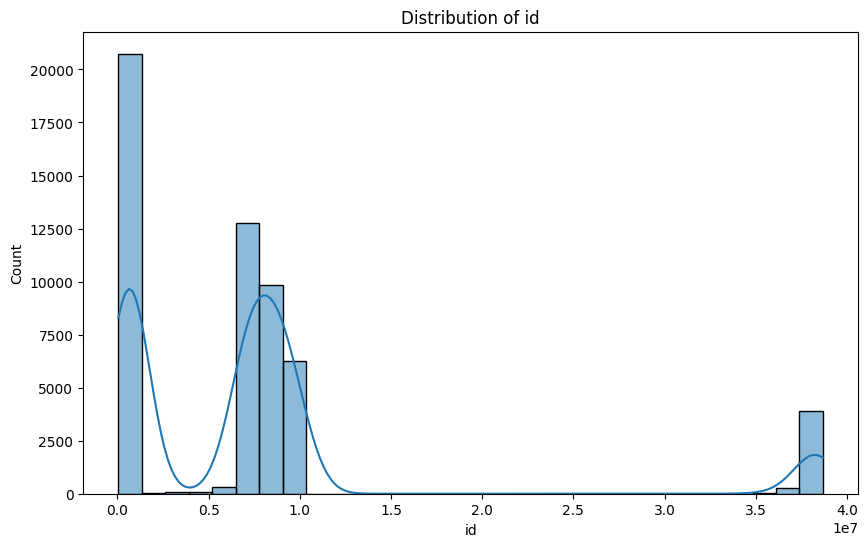

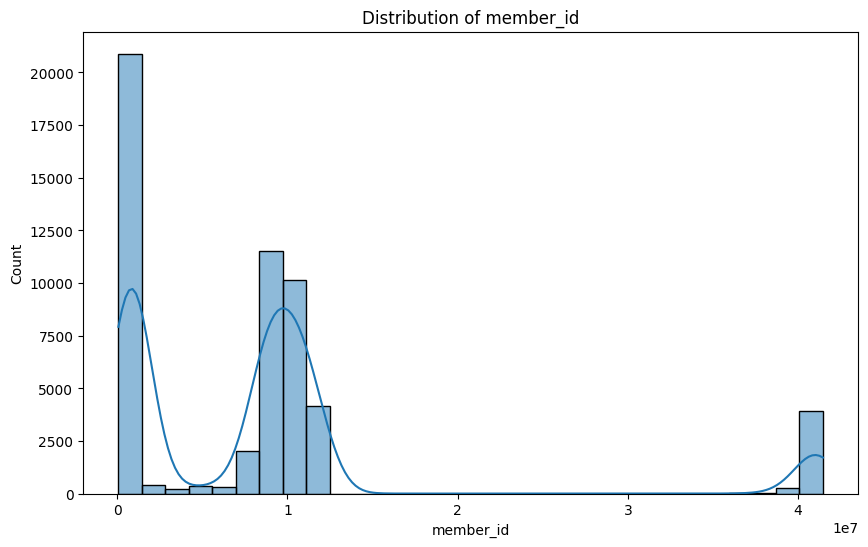

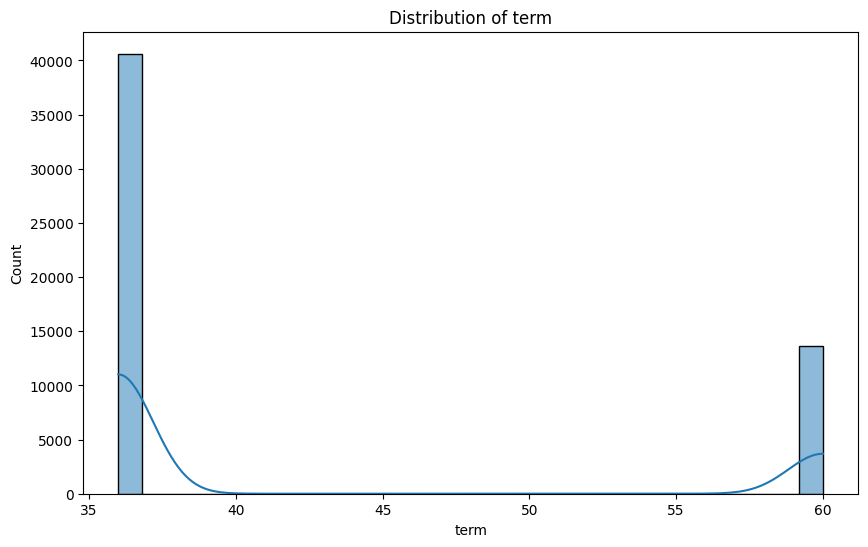

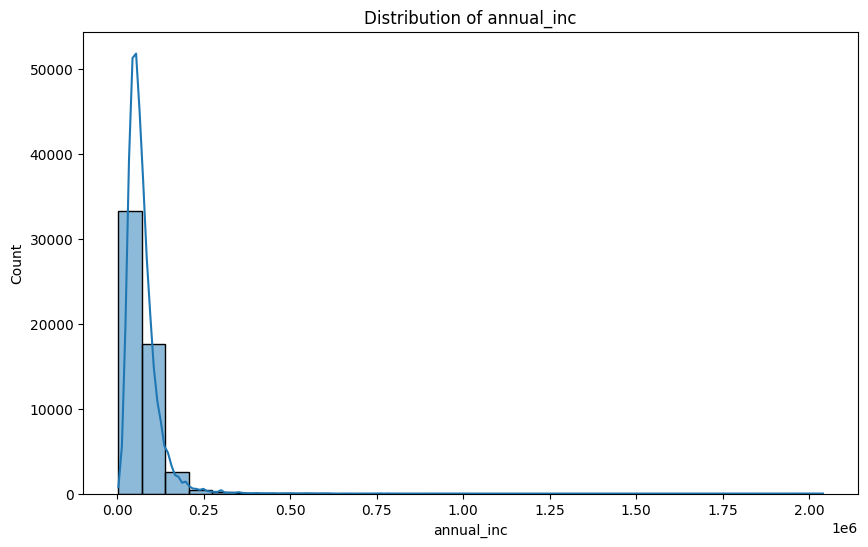

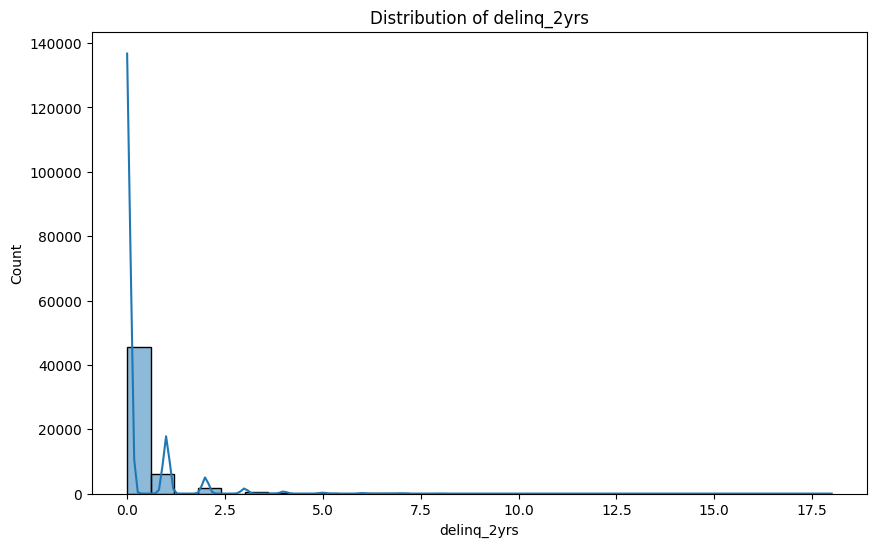

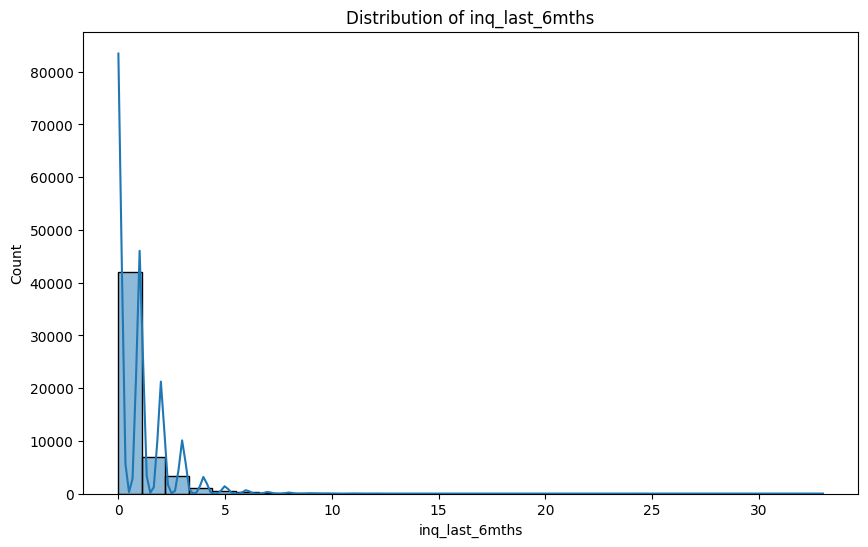

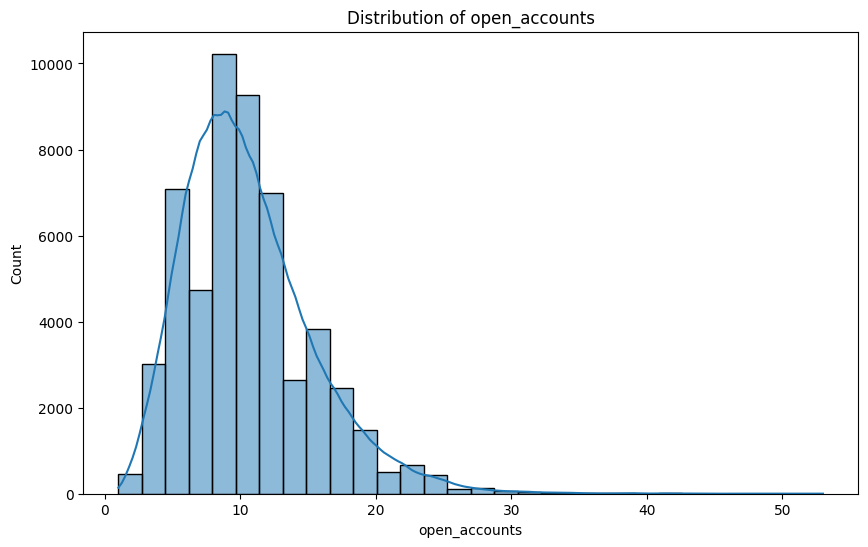

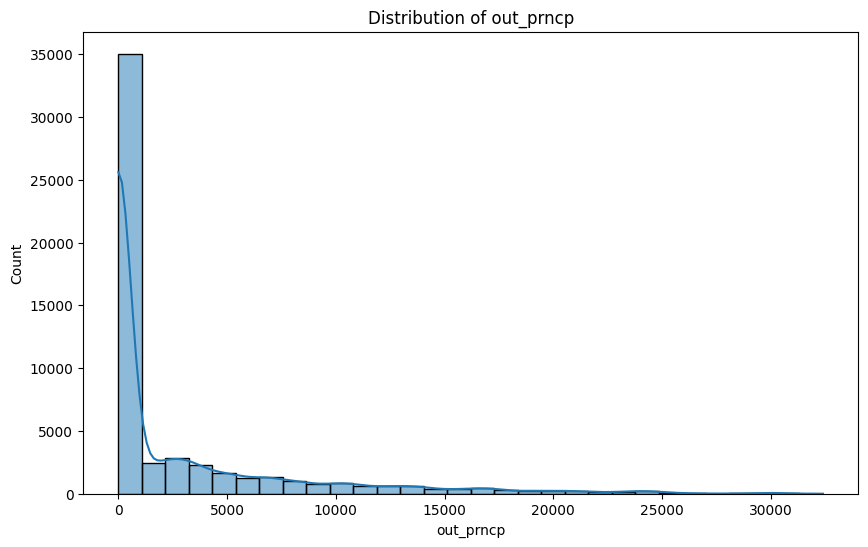

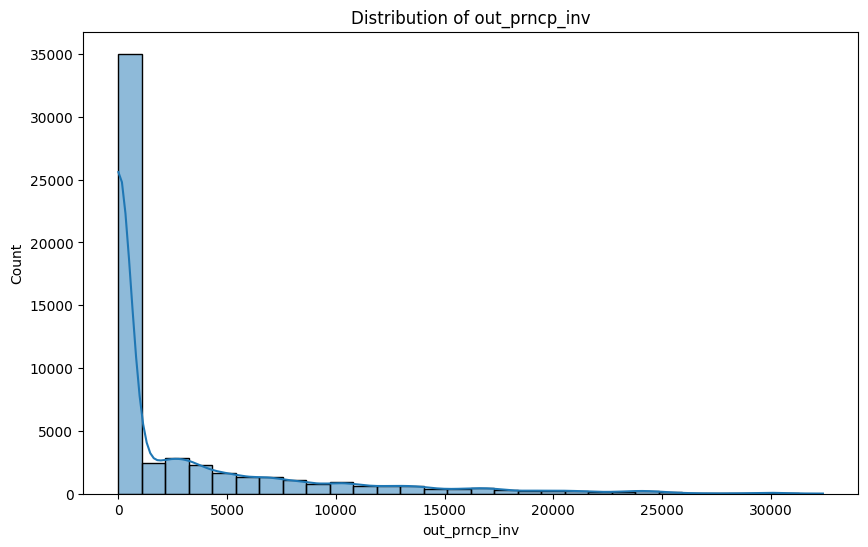

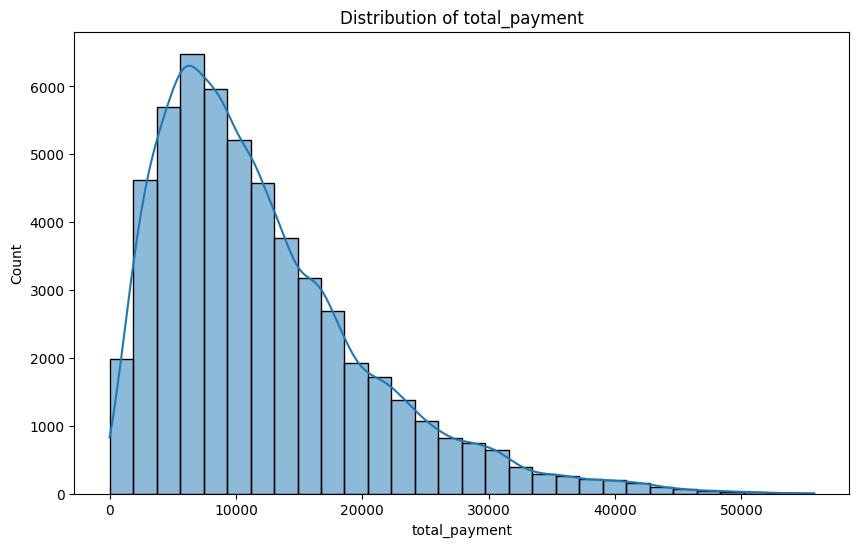

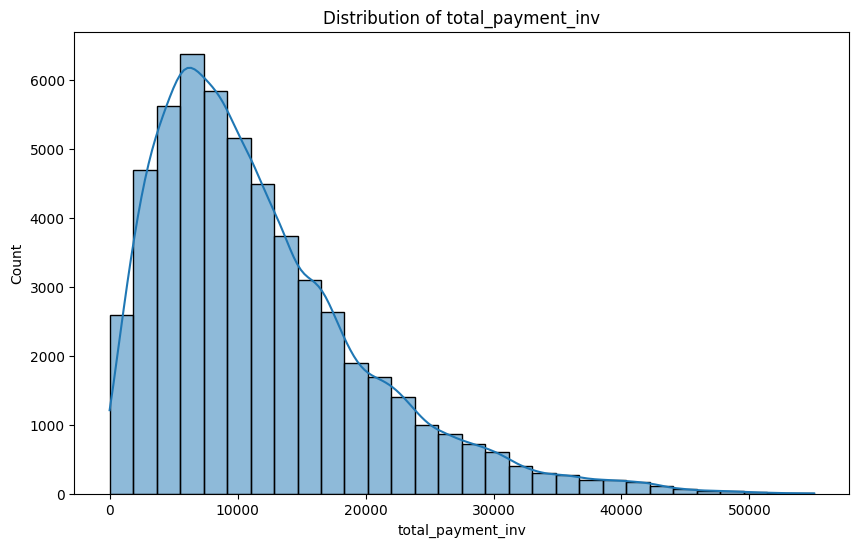

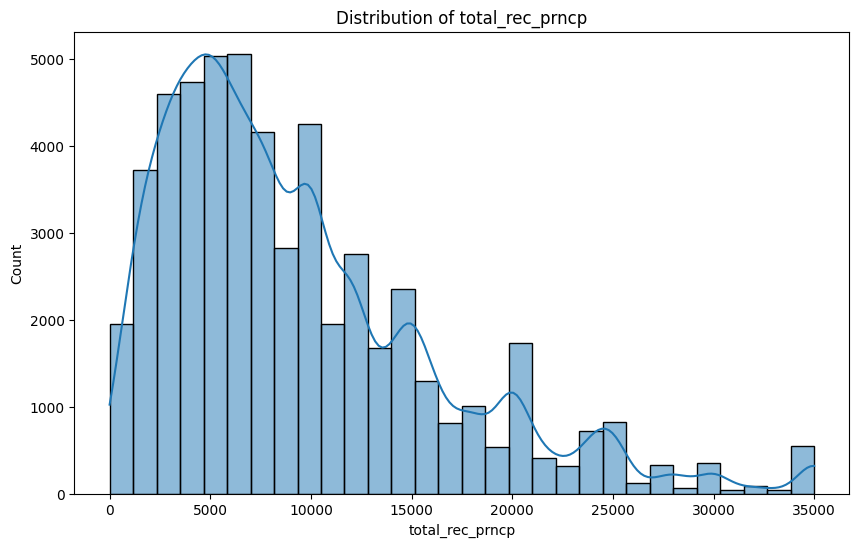

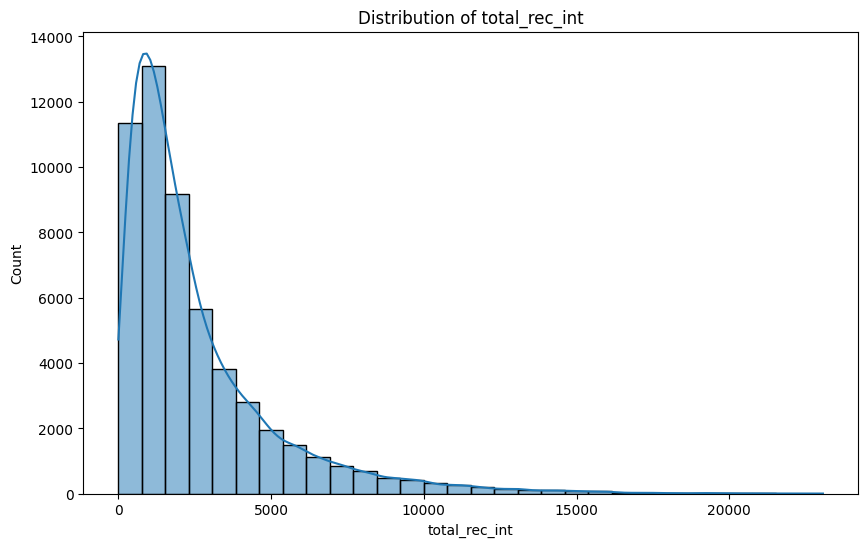

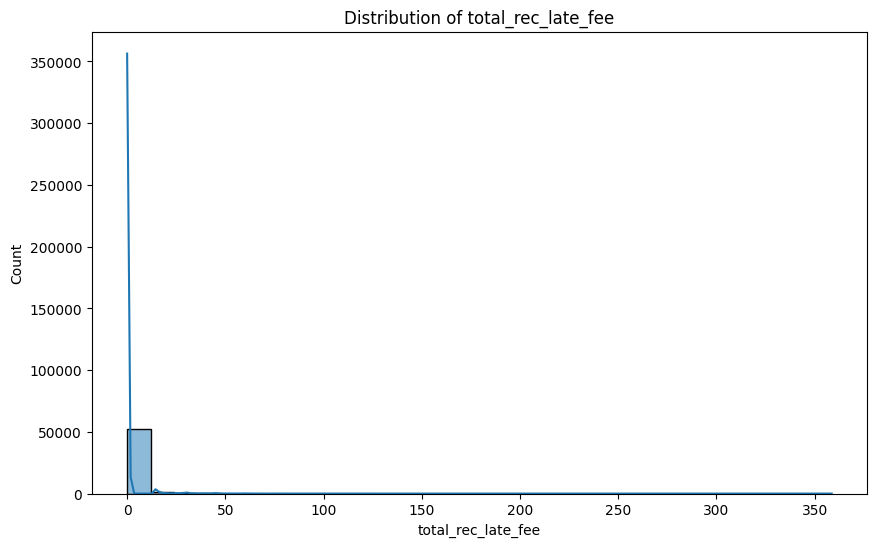

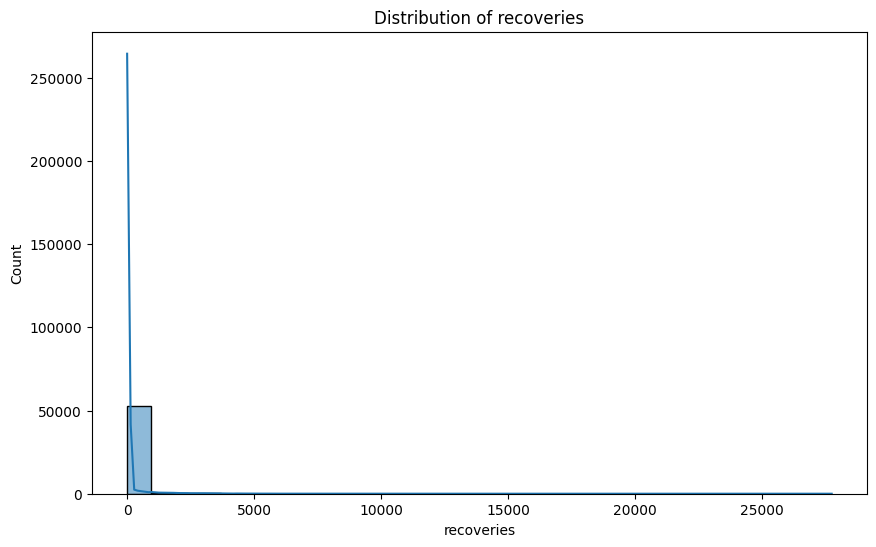

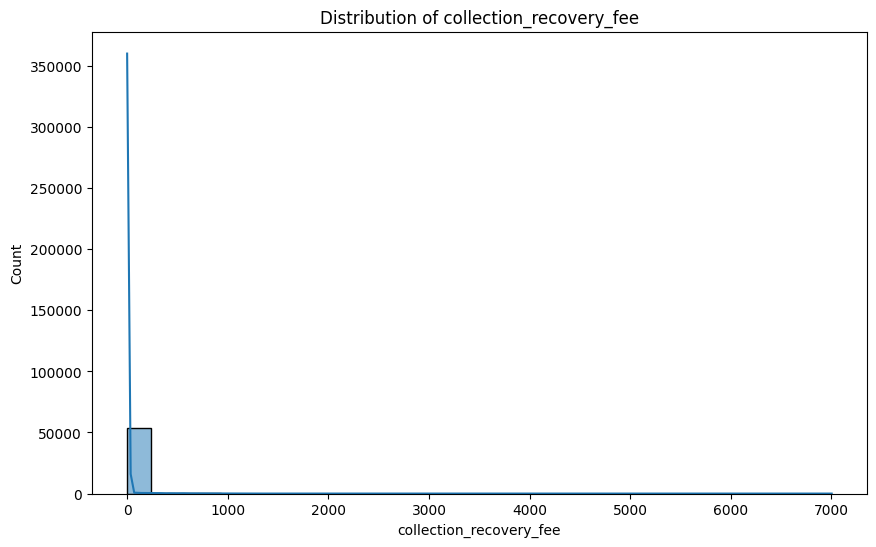

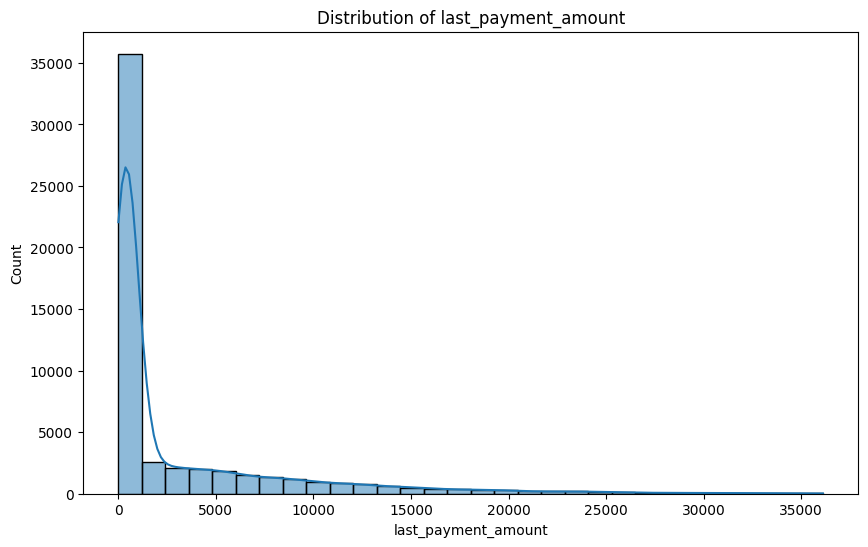

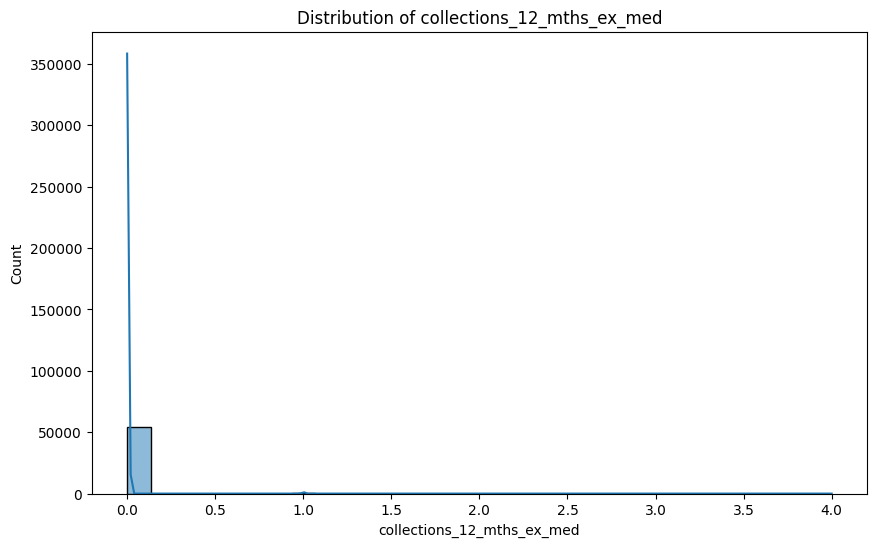

In [ ]:
plotter.plot_skewed_data(skewed_columns)

In [193]:
# Step 2: Apply transformations to skewed columns
transformer.transform_skewed_columns(skewed_columns)

In [194]:
# Step 3: Check skewness after transformation
skewness_after_transformation = transformer.check_transformation()

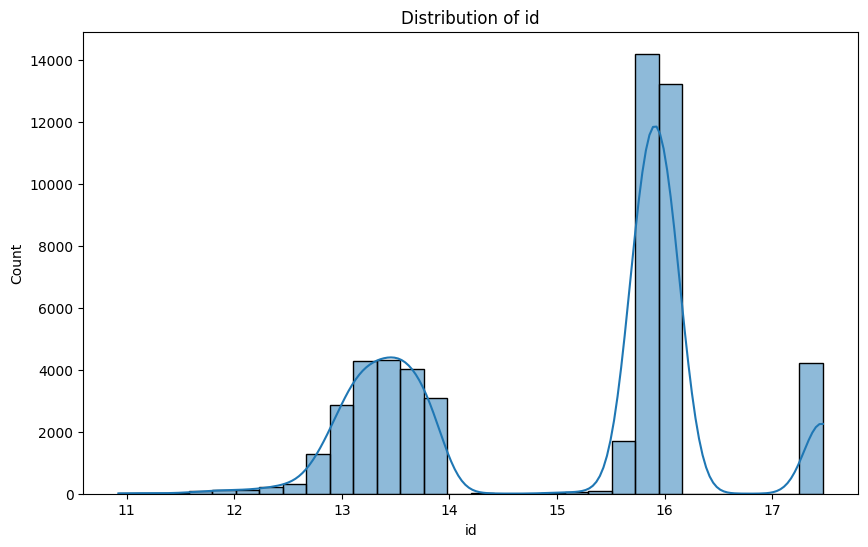

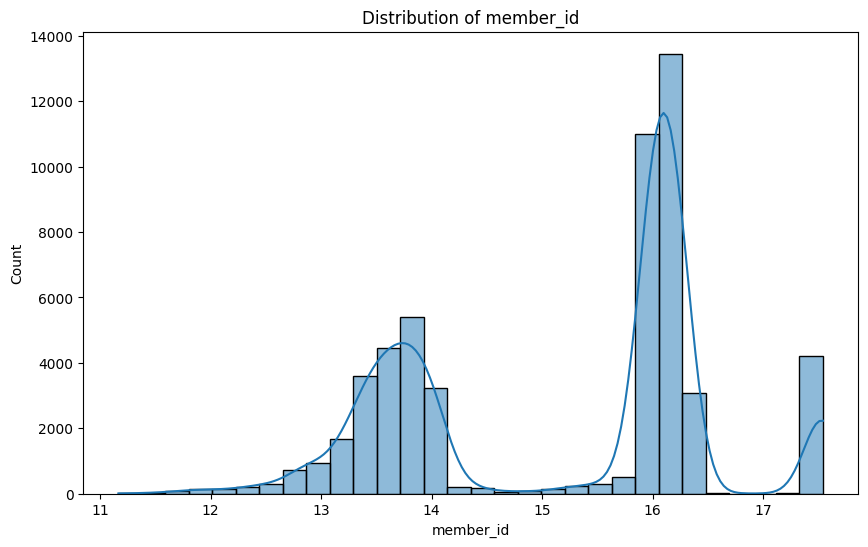

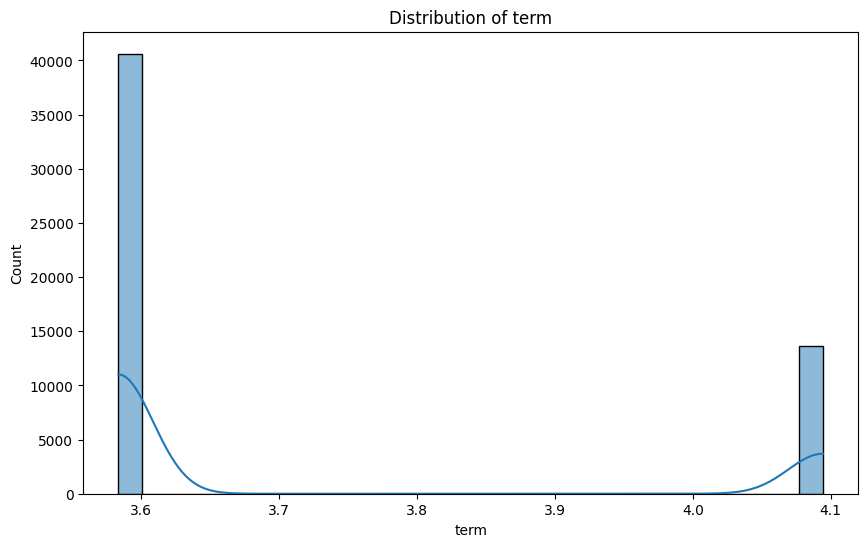

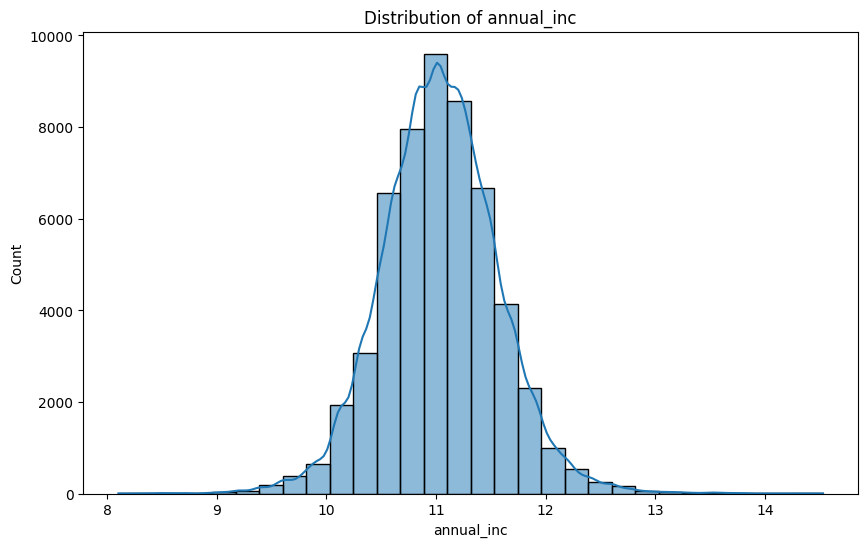

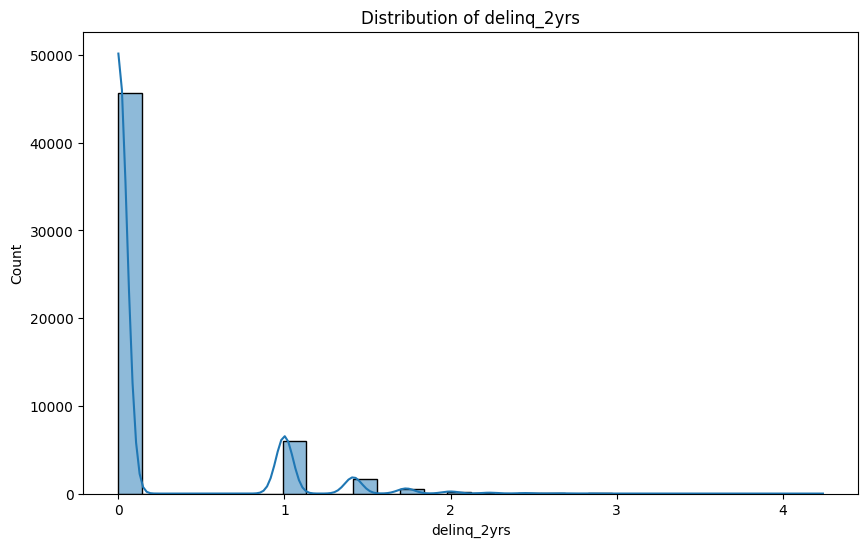

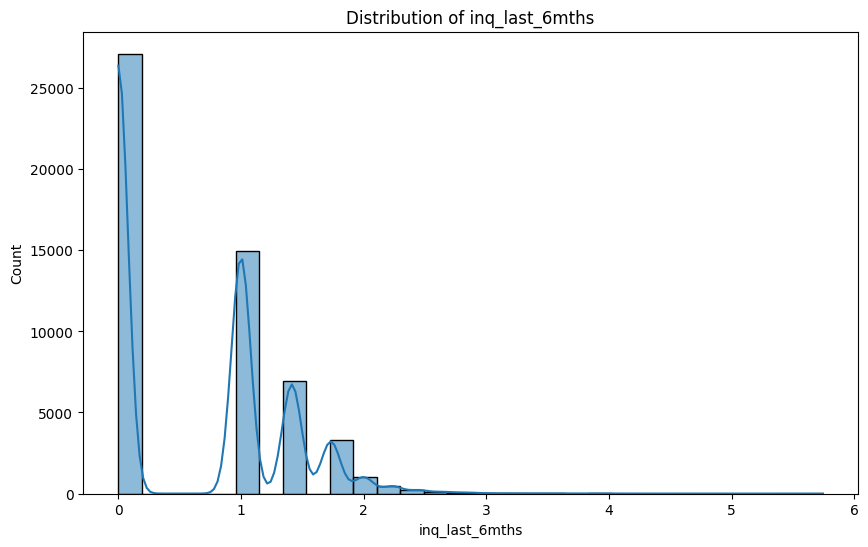

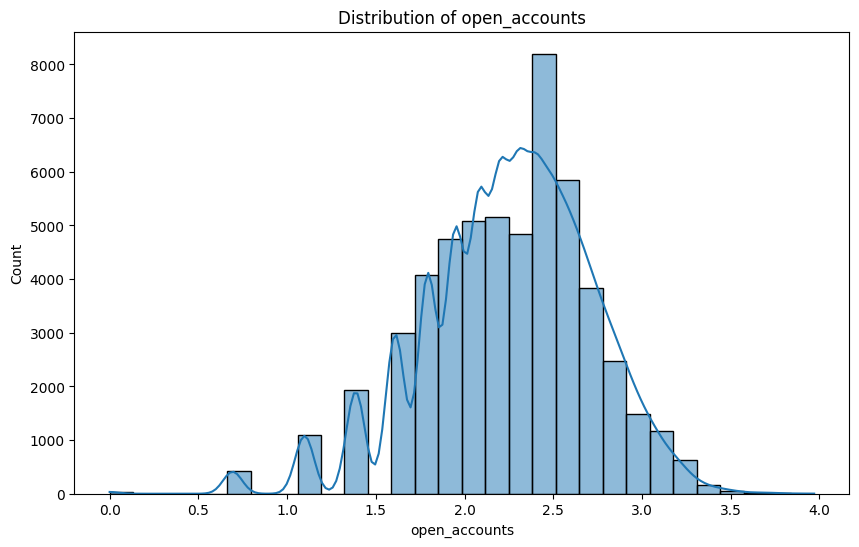

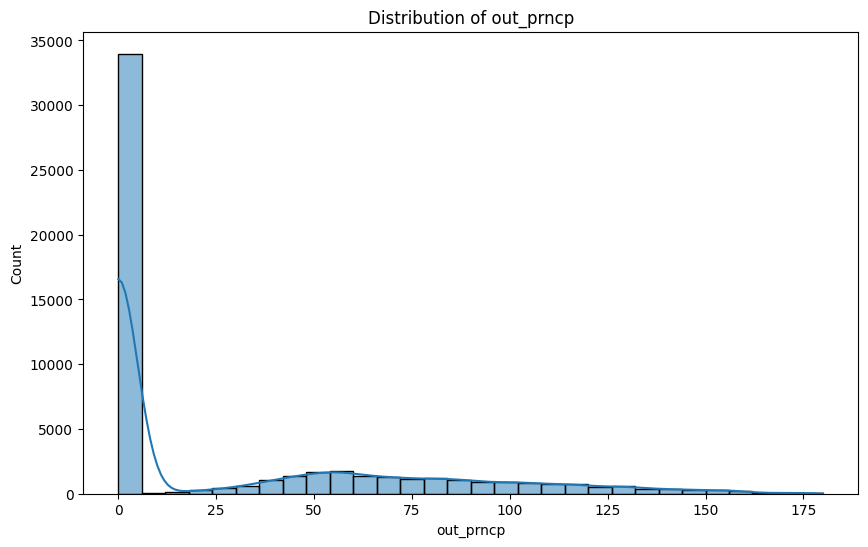

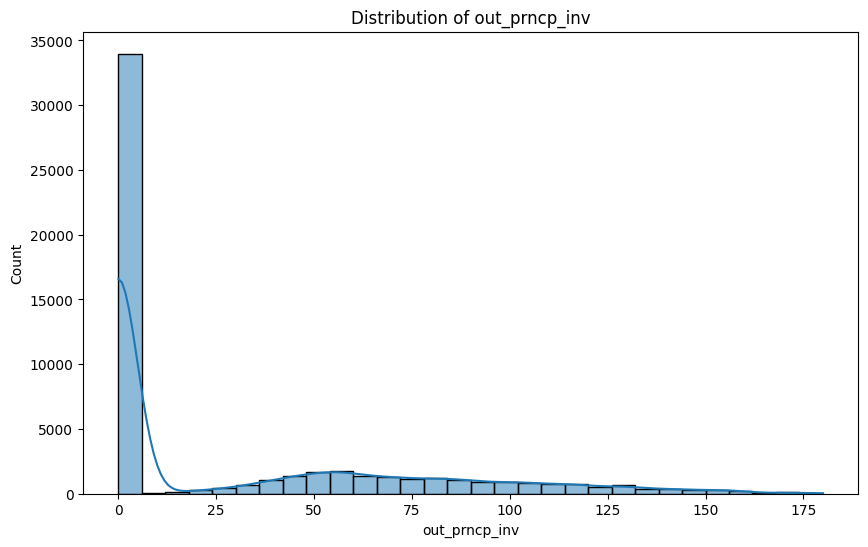

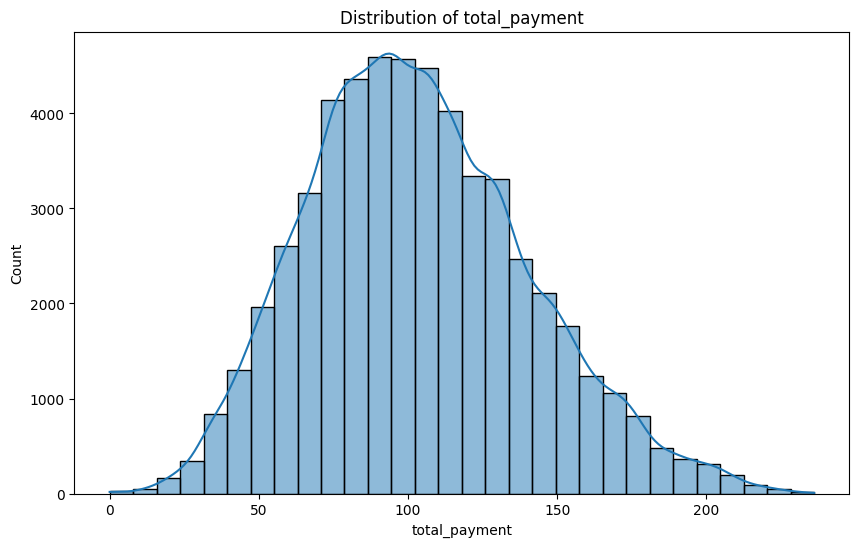

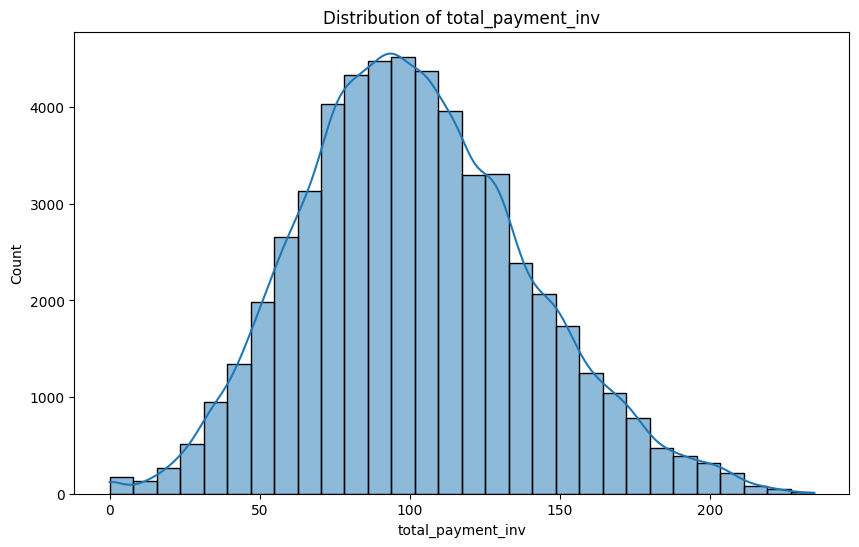

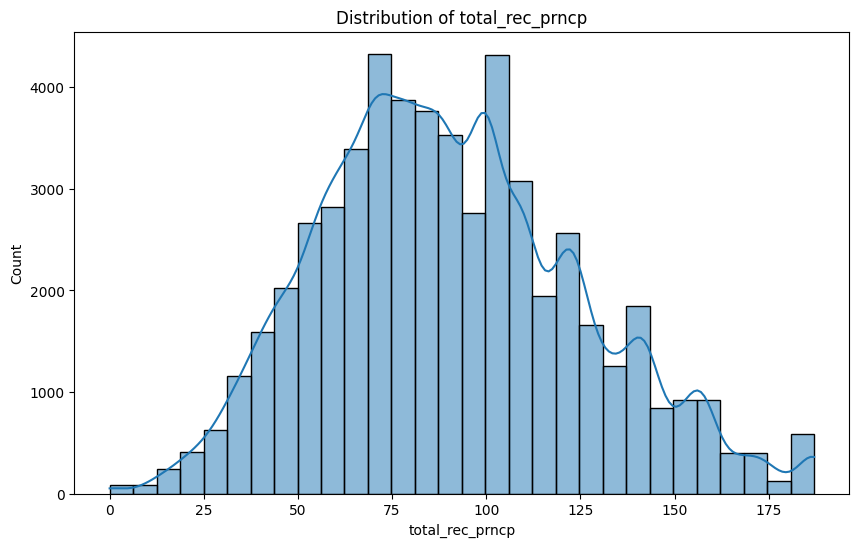

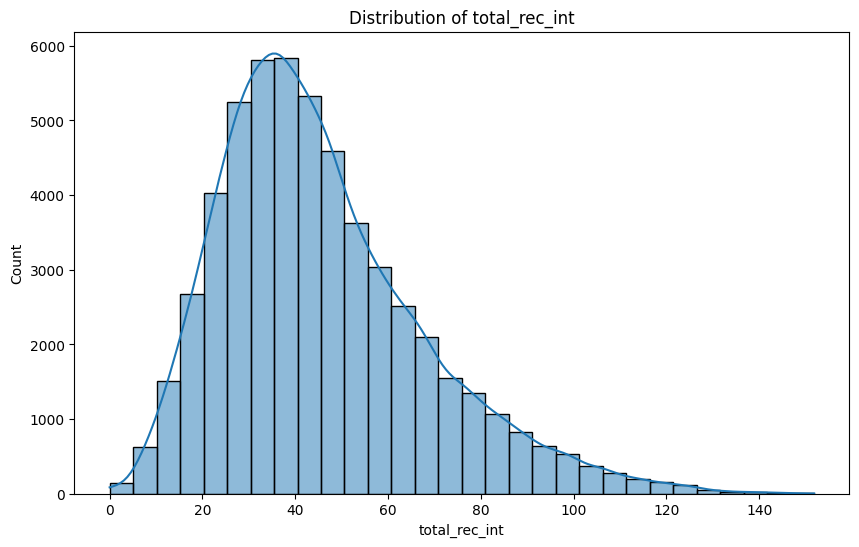

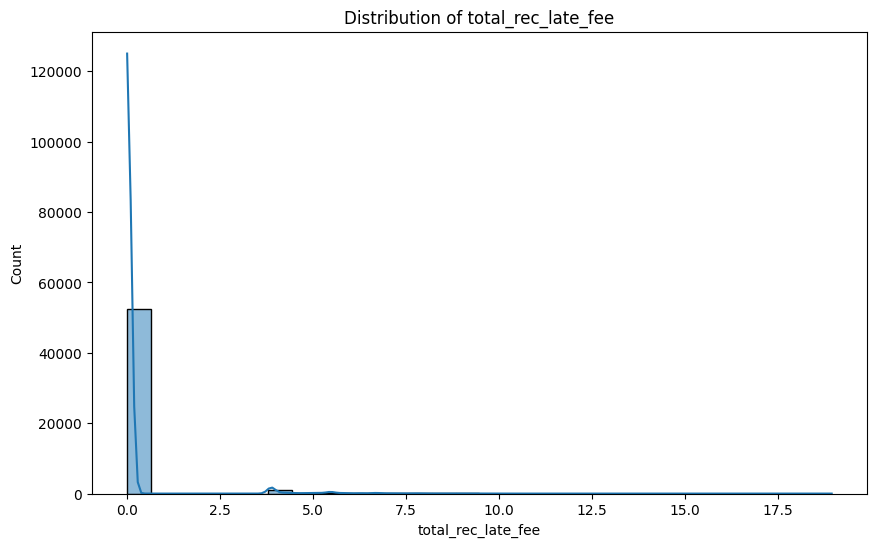

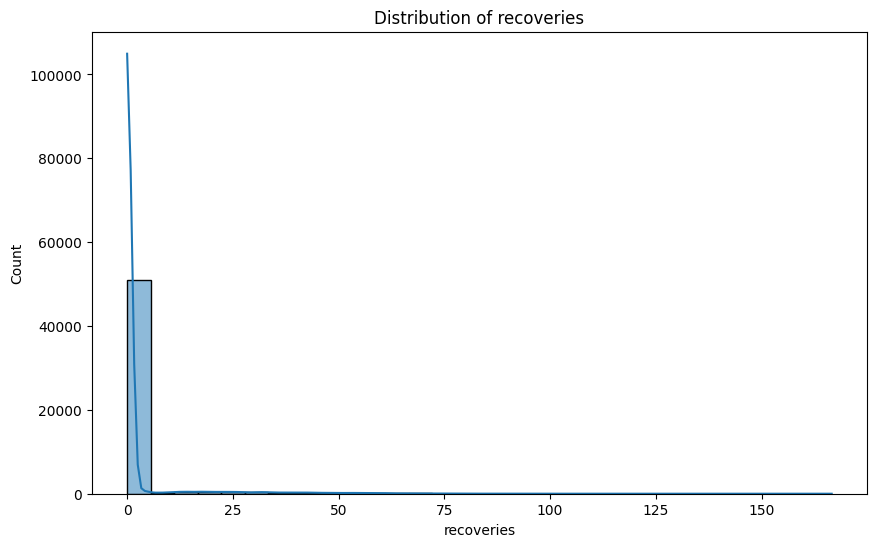

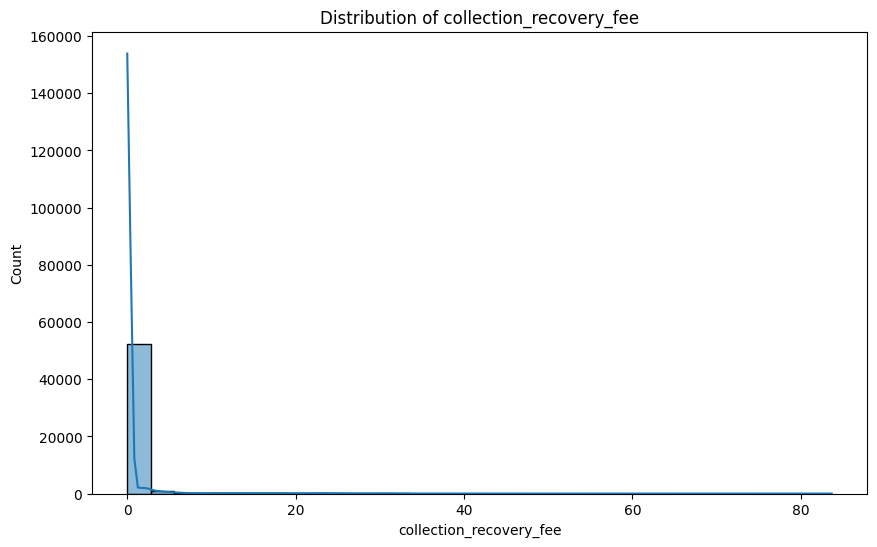

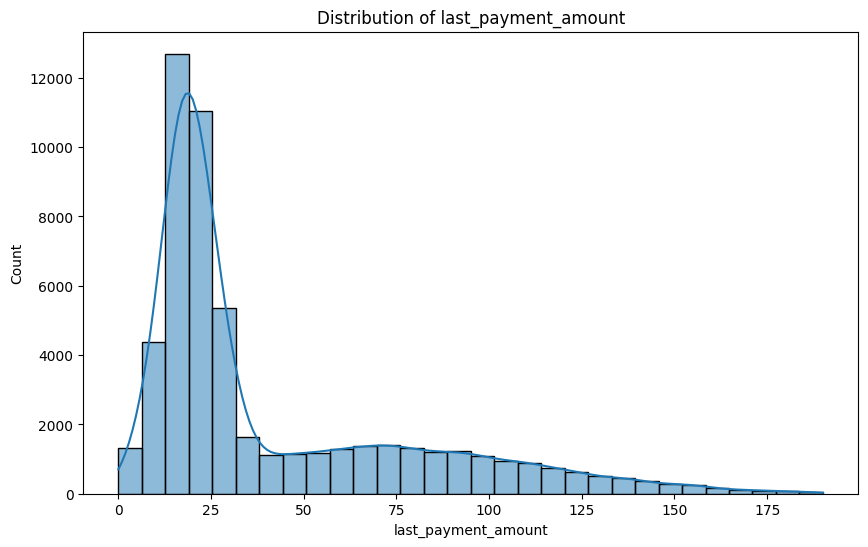

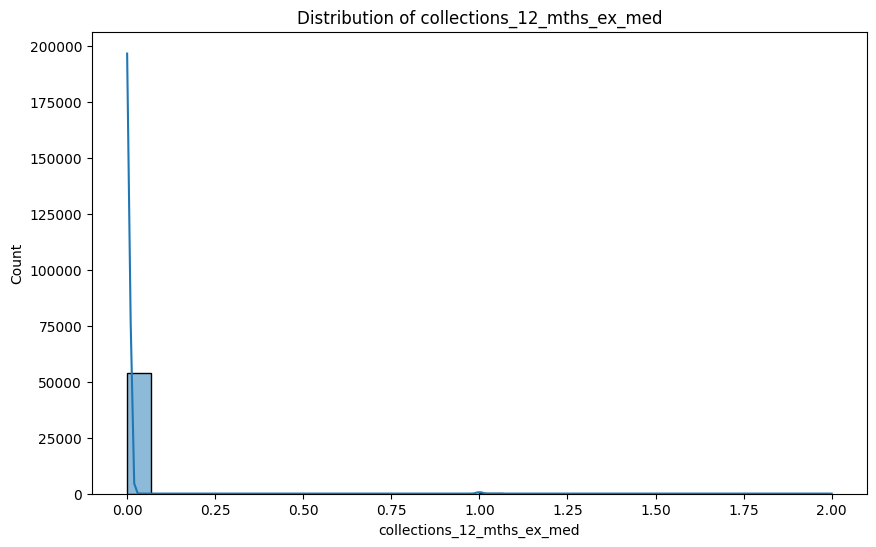

In [195]:
# Step 4: Visualize the transformed data
plotter.plot_histograms(skewed_columns)

In [ ]:
print("Skewness before transformation:", new_df[skewed_columns].skew())
print("Skewness after transformation:", skewness_after_transformation[skewed_columns])

Skewness before transformation: id                            -0.262456
member_id                     -0.285238
term                           1.148358
annual_inc                     0.137774
delinq_2yrs                    2.359301
inq_last_6mths                 0.553141
open_accounts                 -0.471355
out_prncp                      1.224600
out_prncp_inv                  1.224951
total_payment                  0.373938
total_payment_inv              0.294837
total_rec_prncp                0.368947
total_rec_int                  0.918401
total_rec_late_fee             6.277079
recoveries                     5.882776
collection_recovery_fee        9.456175
last_payment_amount            1.436998
collections_12_mths_ex_med    16.536355
dtype: float64
Skewness after transformation: id                            -0.262456
member_id                     -0.285238
term                           1.148358
annual_inc                     0.137774
delinq_2yrs                    2.359301
in